In [1]:
import pandas as pd

In [20]:
data = pd.read_pickle('data/data_II_preparation')

In [21]:
data.head()

,mp_sup_key,date,order_defect_rate_median,late_shipment_rate_median,cancellation_rate_median,valid_tracking_rate_all_cat_median,late_responses_median,fba_median,return_dissatisfaction_rate_median,customer_service_dissatisfaction_rate_beta_median,...,very_large,fba_tresh,no_fba,some_fba,most_fba,full_fba,suspended,year,quarter,conse_suspension
0,000b068c-69b3-426e-a506-9914eaf8710b,2018-02-04,0.24,0.0,0.360,98.675,26.0,0.0,0.0,100.0,...,0,"(-0.01, 0.1]",1,0,0,0,0,2018,1,0
1,000b068c-69b3-426e-a506-9914eaf8710b,2018-02-18,0.24,0.0,1.310,98.645,41.5,0.0,0.0,100.0,...,0,"(-0.01, 0.1]",1,0,0,0,0,2018,1,0
2,000b068c-69b3-426e-a506-9914eaf8710b,2018-03-04,0.25,0.0,1.685,96.340,29.0,0.0,0.0,100.0,...,0,"(-0.01, 0.1]",1,0,0,0,0,2018,1,0
3,000b068c-69b3-426e-a506-9914eaf8710b,2018-03-18,0.26,0.0,4.040,97.440,38.0,0.0,0.0,100.0,...,0,"(-0.01, 0.1]",1,0,0,0,0,2018,1,0
4,000b068c-69b3-426e-a506-9914eaf8710b,2018-04-01,0.27,0.0,2.739,98.877,49.1,0.0,0.0,100.0,...,0,"(-0.01, 0.1]",1,0,0,0,0,2018,2,0


In [22]:
data.dropna(subset = ['order_defect_rate_median'], inplace=True)

In [222]:
data.suspended.value_counts()

0    57518
1     1060
Name: suspended, dtype: int64

In [87]:
def scale(group):
    return pd.DataFrame({
        'original': group,
        'scaled_sales' : group / group.max()
    })

In [64]:
scaled_sales = data.groupby('mp_sup_key')['sales_7_days_median'].apply(scale)

In [70]:
data = pd.concat([data, scaled_sales], axis=1)

In [151]:
suspended = data.loc[data.suspended == 1].copy()
not_suspended = data.loc[data.suspended == 0].copy()

In [152]:
len(not_suspended.mp_sup_key.unique())

2667

In [153]:
not_suspended_one_obs_per_seller =  not_suspended.groupby('mp_sup_key').apply(lambda x: x.sample(1)).reset_index(drop=True)

In [154]:
final_not_suspended = not_suspended_one_obs_per_seller.sample(len(suspended))

In [155]:
dataset = pd.concat([suspended, final_not_suspended])
datasetet = dataset.sample(frac=1)
dataset.reset_index(inplace=True)

## Features

In [156]:
datasetet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2120 entries, 36703 to 28128
Data columns (total 66 columns):
mp_sup_key                                           2120 non-null object
date                                                 2120 non-null datetime64[ns]
order_defect_rate_median                             2120 non-null float64
late_shipment_rate_median                            2089 non-null float64
cancellation_rate_median                             2084 non-null float64
valid_tracking_rate_all_cat_median                   1575 non-null float64
late_responses_median                                1947 non-null float64
fba_median                                           2120 non-null float64
return_dissatisfaction_rate_median                   1322 non-null float64
customer_service_dissatisfaction_rate_beta_median    1782 non-null float64
delivered_on_time_median                             1765 non-null float64
sales_7_days_median                                  1928

In [257]:
features =['order_defect_rate_max', 'late_shipment_rate_max', 'cancellation_rate_max', 'ok_days_sum',
          'late_responses_max', 'scaled_sales', 'products_removal_max', 'policy_warning_max', 'customer_service_dissatisfaction_rate_beta_max', 
          'invoice_requested_max', 'intellectual_property_max', 'infringement_max', 'pricing_error_max', 'delivered_on_time_median',
          'negative_customer_experiences_max', 'reserve_max', 'sales_7_days_change_from_1_period', 'sales_7_days_change_from_2_period', 'sharpe_ratio',
          'other_max', 'has_active_loan_max', 'small', 'medium', 'large', 'very_large', 'no_fba', 'some_fba', 'most_fba', 'full_fba']
label = 'suspended'

In [258]:
X = dataset.loc[:, features].copy()
y = dataset.loc[:, label].copy()

In [259]:
X = X.apply(lambda col: col/col.max())

In [260]:
X.loc[:, :'other_max'] = X.loc[:, :'other_max'].fillna(-99)

In [239]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2120 entries, 0 to 2119
Data columns (total 29 columns):
order_defect_rate_max                             2120 non-null float64
late_shipment_rate_max                            2120 non-null float64
cancellation_rate_max                             2120 non-null float64
ok_days_sum                                       2120 non-null float64
late_responses_max                                2120 non-null float64
scaled_sales                                      2120 non-null float64
products_removal_max                              2120 non-null float64
policy_warning_max                                2120 non-null float64
customer_service_dissatisfaction_rate_beta_max    2120 non-null float64
invoice_requested_max                             2120 non-null float64
intellectual_property_max                         2120 non-null float64
infringement_max                                  2120 non-null float64
pricing_error_max            

# Model

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify = y)

In [262]:
rf=RandomForestClassifier(n_estimators=100)

In [263]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Text(0.5, 103.73999999999997, 'Predicted label')

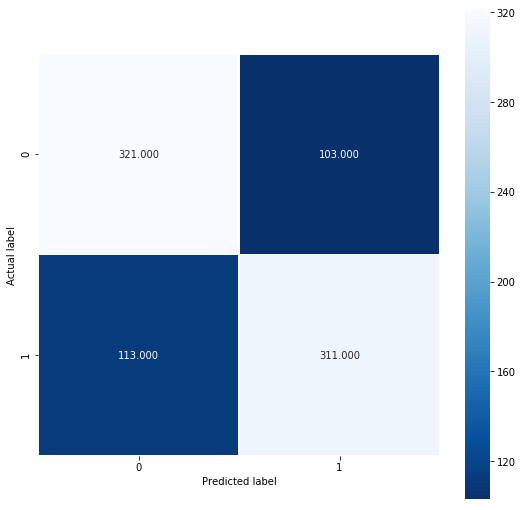

In [264]:
y_pred = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm_rf, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label')

In [265]:
recall_score(y_test, y_pred)

0.7334905660377359

In [266]:
precision_score(y_test, y_pred)

0.751207729468599

In [256]:
imp = pd.DataFrame(rf.feature_importances_, index=X.columns).sort_values(0, ascending = False)
imp

,0
ok_days_sum,0.136467
order_defect_rate_max,0.134581
other_max,0.093099
scaled_sales,0.089920
delivered_on_time_min,0.077800
late_responses_max,0.070631
customer_service_dissatisfaction_rate_beta_max,0.054945
cancellation_rate_max,0.051289
late_shipment_rate_max,0.050532
pricing_error_max,0.033369


In [131]:
compare = pd.DataFrame(y_test)
compare['predicted'] = rf.predict(X_test)
compare['proba'] = rf.predict_proba(X_test)[:,-1]

In [133]:
bad_pred = compare[compare.suspended != compare.predicted]

In [134]:
bad_pred

,suspended,predicted,proba
1430,0,1,0.865371
599,1,0,0.500000
1128,0,1,1.000000
1775,0,1,0.550000
33,1,0,0.220000
737,1,0,0.220000
1067,0,1,0.540000
1463,0,1,0.640000
1086,0,1,0.770000
1089,0,1,0.620000


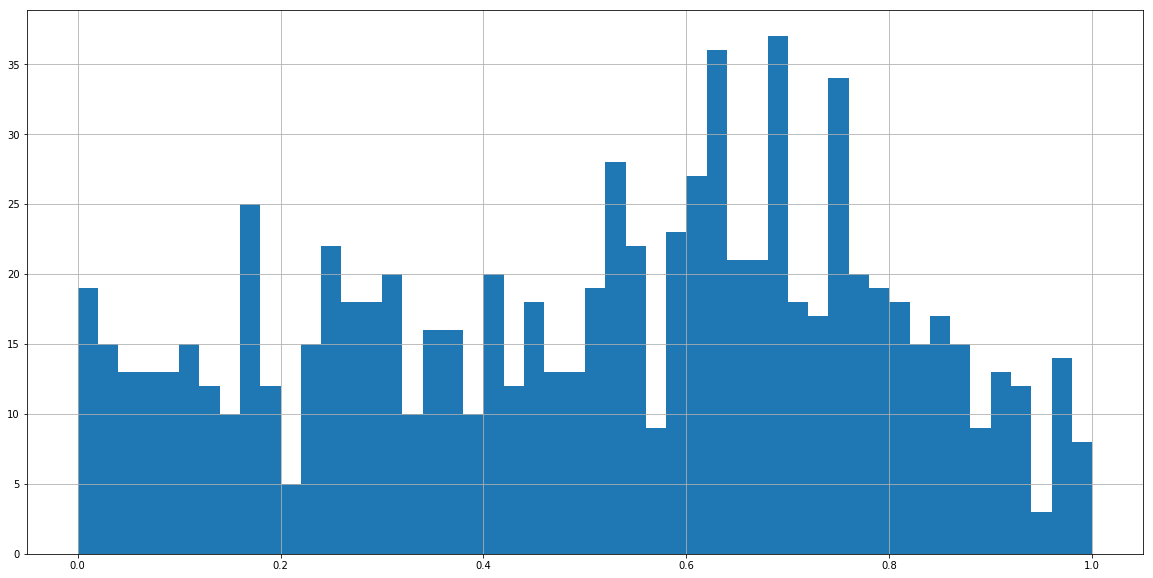

In [135]:
compare.proba.hist(figsize=(20,10), bins=50)

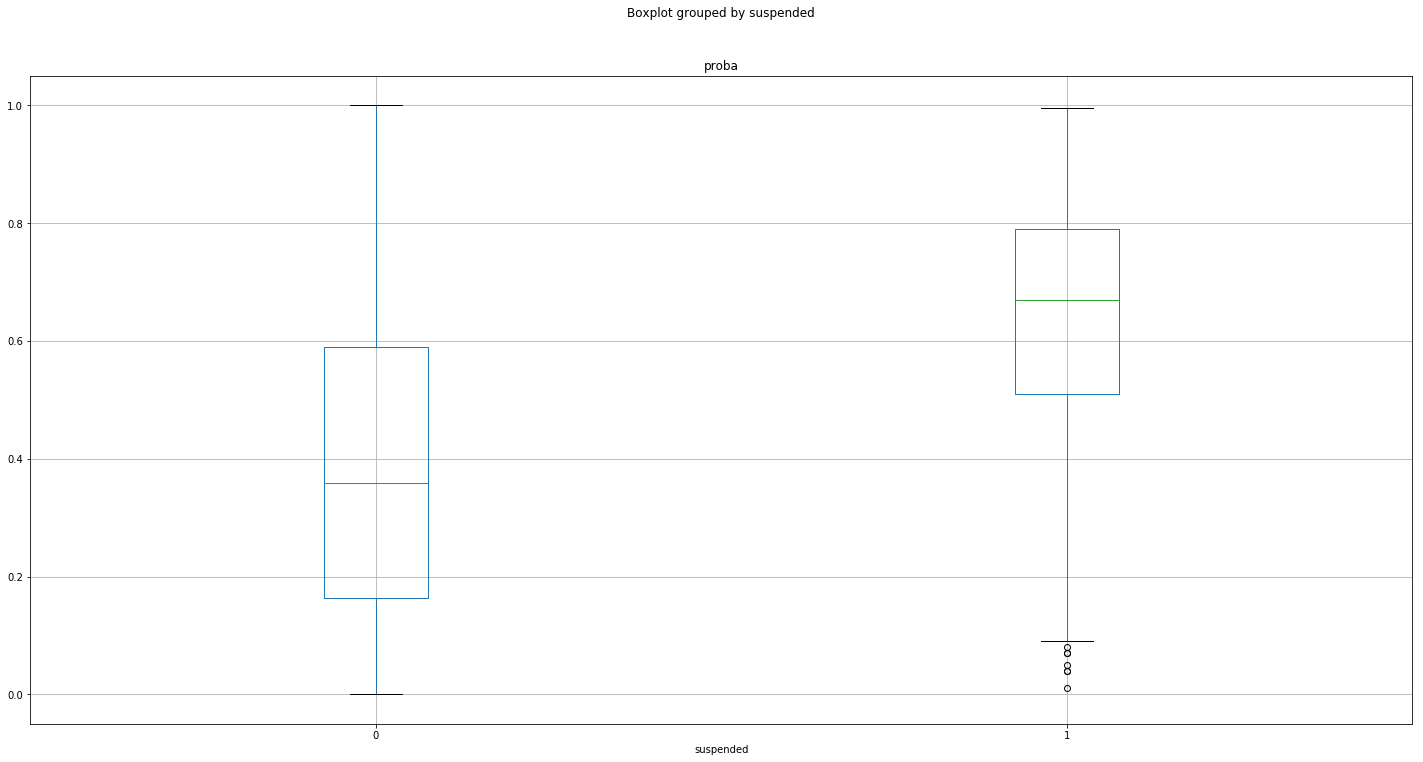

In [267]:
compare.boxplot(column='proba', by = 'suspended', figsize = (24,12))

In [268]:
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve

In [269]:
precision, recall, _ = precision_recall_curve(y_test, compare.proba)

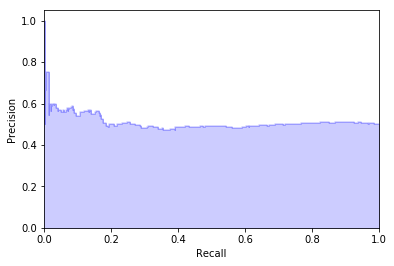

<Figure size 2160x1080 with 0 Axes>

In [270]:
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.figure(figsize=(30,15))
plt.show()